<a href="https://colab.research.google.com/github/jisusP/Articulo/blob/main/Candida_albicans_coseno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit 
!pip install sklearn
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.metrics.pairwise import cosine_similarity
import plotly.figure_factory as ff
smiles = [
    "CCC1=CC=C2N=C(C=CC2=C1)C1=NC=CC=C1",
    "ClC1=CC=C2N=C(C=CC2=C1)C1=CN=CC=C1",
    "FC1=CC=C2N=C(C=CC2=C1)C1=CN=CC=C1",
    "C1=CC=C2N=C(C=CC2=C1)C1=CC=NC=C1",
    "CC1=CC=C2N=C(C=CC2=C1)C1=CC=NC=C1",
    "ClC1=CC=C2N=C(C=CC2=C1)C1=CC=NC=C1",
    "ClC1=C2N=C(C=CC2=CC=C1)C1=CC=NC=C1",
    "FC1=CC=C2N=C(\\C=C\\C3=NC=CC=C3)C=CC2=C1",
    "C(=C/C1=NC2=CC=CC=C2C=C1)\\C1=CN=CC=C1",
    "ClC1=CC=C2N=C(\\C=C\\C3=CN=CC=C3)C=CC2=C1",
    "C(=C/C1=NC2=CC=CC=C2C=C1)\\C1=CC=NC=C1",
    "ClC1=CC=C2N=C(\C=C\C3=CC=NC=C3)C=CC2=C1 "
]
mols = [Chem.MolFromSmiles(smile) for smile in smiles]
fps = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024) for mol in mols]
similarity_matrix_cos = cosine_similarity(fps)


In [9]:
from scipy.spatial.distance import pdist, squareform
distance_matrix_euc = squareform(pdist(fps, 'euclidean'))
similarity_matrix_euc = 1 / (1 + distance_matrix_euc)

In [12]:
from rdkit import Chem
from rdkit import DataStructs
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

similarity_matrix_tani = np.zeros((len(fps), len(fps)))
for i in range(len(fps)):
    for j in range(i+1, len(fps)):
        similarity = DataStructs.TanimotoSimilarity(fps[i], fps[j])
        similarity_matrix_tani[i][j] = similarity
        similarity_matrix_tani[j][i] = similarity 
distance_tani = 1-(similarity_matrix_tani)

# **Coeficiente coseno**

In [2]:
#Matriz 1_ 
distance_matrix_cos = 1 - similarity_matrix_cos
lab = ["6 (62/250)","7 (>250)","8 (>250)","9 (62/250)","10 (125/250)","11 (>250)","12 (>250)","13 (125/>250)","14 (250/>250)","15 (>250)","16 (62/250)","17 (125/>250)"]
fig = ff.create_dendrogram(distance_matrix_cos, labels= lab)
fig.update_layout(width=800, height=500, title = "Cándida Albicans (C. coseno 1)", title_x=0.5)
fig.show()

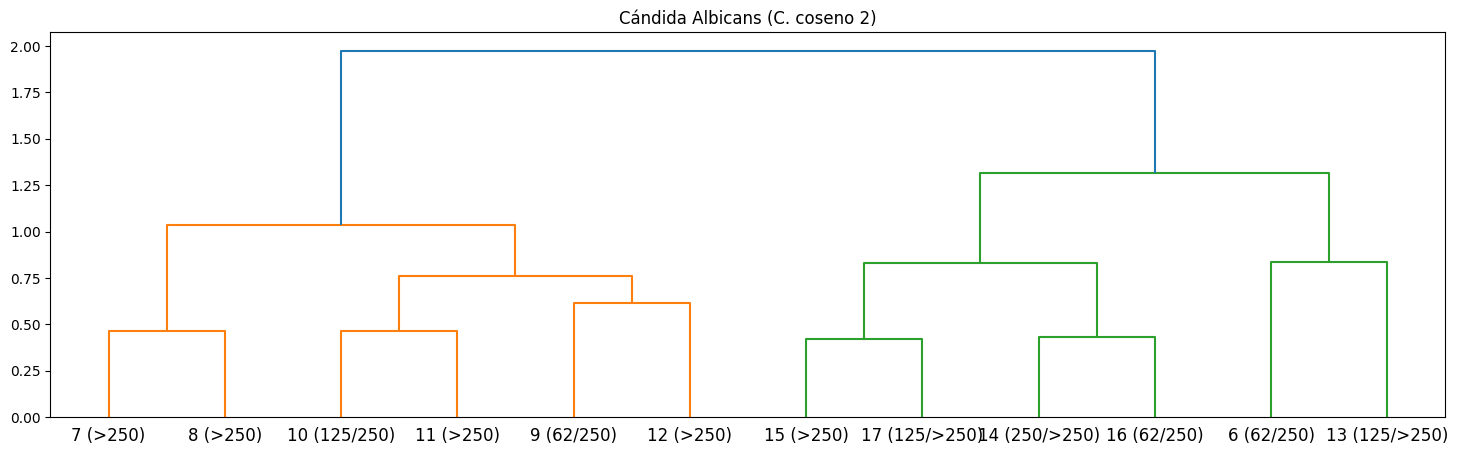

In [8]:
#Matriz 2
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(18,5))
plt.title("Cándida Albicans (C. coseno 2)")
d = shc.dendrogram(shc.linkage(distance_matrix_cos, method = "ward"), labels = lab)

# **Distancia Euclidiana**

In [10]:
#Matriz 1
fig = ff.create_dendrogram(distance_matrix_euc, labels= lab)
fig.update_layout(width=800, height=500,  title = "Cándida Albicans (D. euclidiana 1)", title_x=0.5)
fig.show()

<ipython-input-11-fb02e6e323c1>:4: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



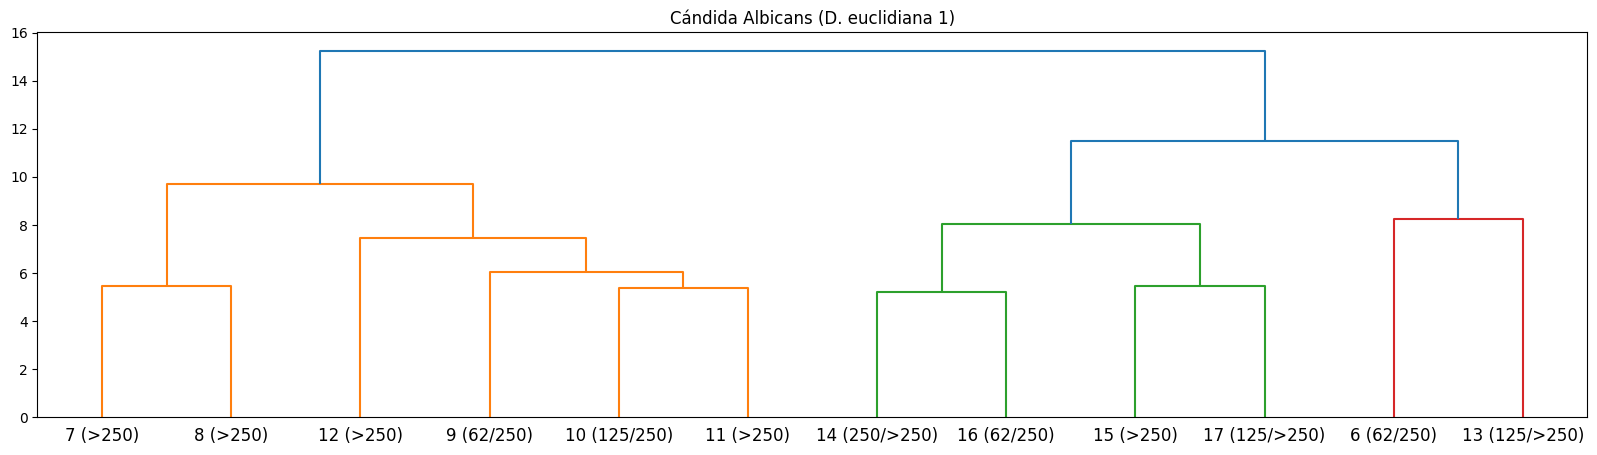

In [11]:
#Matriz 2
plt.figure(figsize=(20,5))
plt.title("Cándida Albicans (D. euclidiana 1)")
d = shc.dendrogram(shc.linkage(distance_matrix_euc, method = "ward"), labels = lab)

# **Tanimoto**

In [13]:
#Matriz 1
fig = ff.create_dendrogram(distance_tani, labels=lab)
fig.update_layout(width=800, height=500, title = "Cándida Albicans (Tanimoto 1)", title_x=0.5)
fig.show()

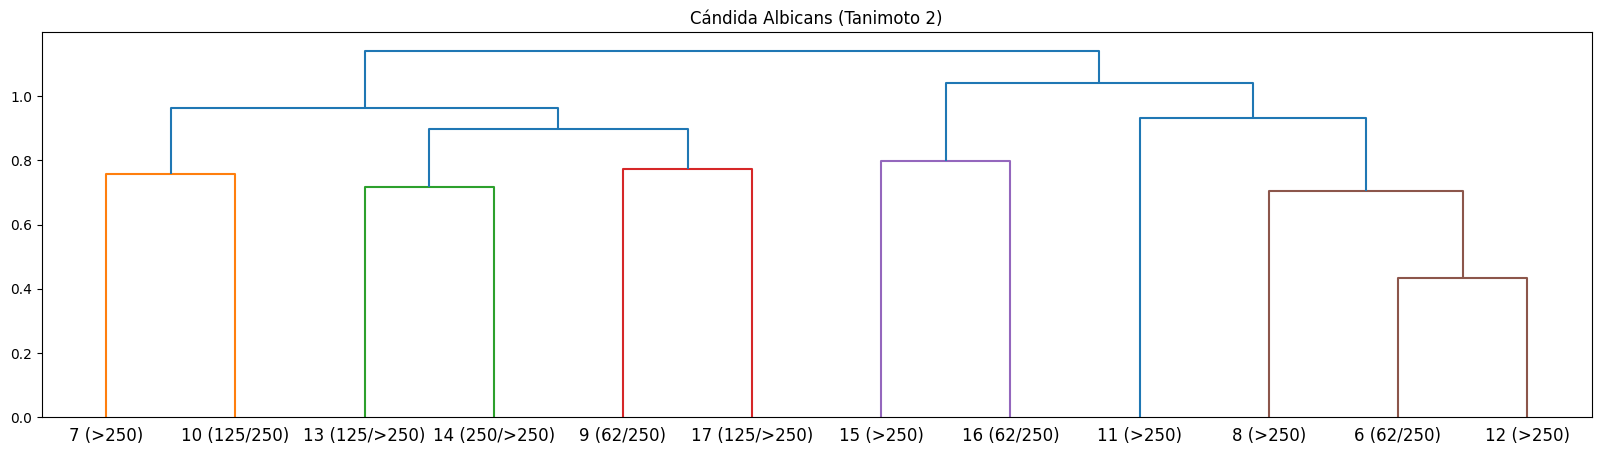

In [14]:
#Matriz 2
plt.figure(figsize=(20,5))
plt.title("Cándida Albicans (Tanimoto 2)")
d = shc.dendrogram(shc.linkage(distance_tani, method = "ward"), labels = lab)